# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 📚 LOAD PACKAGES

we will be loading all the packages which are required to our analysis

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## 📁 Load the Dataframe
The abalone data is present at the location data/abalone.csv, the columns attributes are described above.

In [3]:
# Loading the data

abalone = pd.read_csv('./data/abalone.csv')
abalone.head()

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0   M   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   M   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   F   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   M   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   I   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   rings   age  
0     15  16.5  
1      7   8.5  
2      9  10.5  
3     10  11.5  
4      7   8.5

As, we can see that there are about 8 columns, with names which are self-explanatory.

### 📊 Exploratory Data Analysis

In [4]:
# A Quick glimpse of the data

abalone.info()
abalone.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


length     diameter       height     whole_wt   shucked_wt  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.221963   
min       0.075000     0.055000     0.000000     0.002000     0.001000   
25%       0.450000     0.350000     0.115000     0.441500     0.186000   
50%       0.545000     0.425000     0.140000     0.799500     0.336000   
75%       0.615000     0.480000     0.165000     1.153000     0.502000   
max       0.815000     0.650000     1.130000     2.825500     1.488000   

        viscera_wt     shell_wt        rings          age  
count  4177.000000  4177.000000  4177.000000  4177.000000  
mean      0.180594     0.238831     9.933684    11.433684  
std       0.109614     0.139203     3.224169     3.224169  
min       0.000500     0.001500     1.000000     2.500000  
25%       0.093500     0.130000     8.000000     9.500000  
50%       0.171000     0.234000     9.000000    10.500000  
75%       0.253000     0.329000    11.000000    12.500000  
max       0.760000     1.005000    29.000000    30.500000

There are a total of 4177 entries of the sales data, with no missing values in any of the columns

Now, Let's check about the duplicate values in the data

In [5]:
# Are there any duplicate values?

dups = abalone[abalone.duplicated()]
print(f"Number of duplicate values in the data are: {len(dups)}")

Number of duplicate values in the data are: 0


<AxesSubplot:>

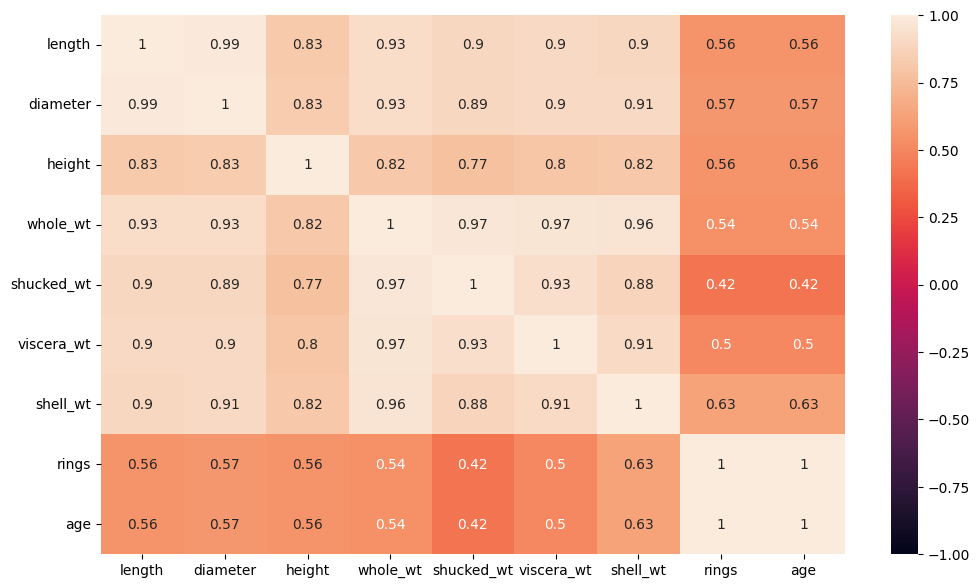

In [6]:
# Correlation Matrix

sns.heatmap(abalone.corr(), annot=True, vmin=-1, vmax=1)

As you can see that there are many columns which are similar to each other in the data.

The correlation between those columns is very high.

It is not surprising that all the different types of weights are highly correlated to each other as they are almost a same physical characteristic of a abalone.

#### Scatter Matrix

Let's make a scatter matrix to see the variables taken two at a time.

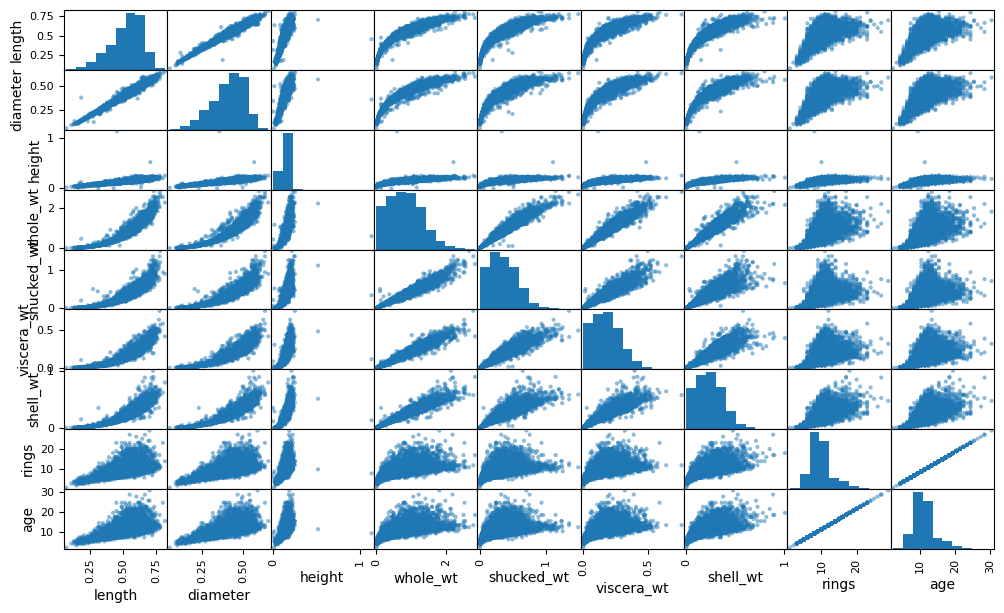

In [7]:
# Scatter Matrix

_ = pd.plotting.scatter_matrix(abalone)

M    1528
I    1342
F    1307
Name: sex, dtype: int64

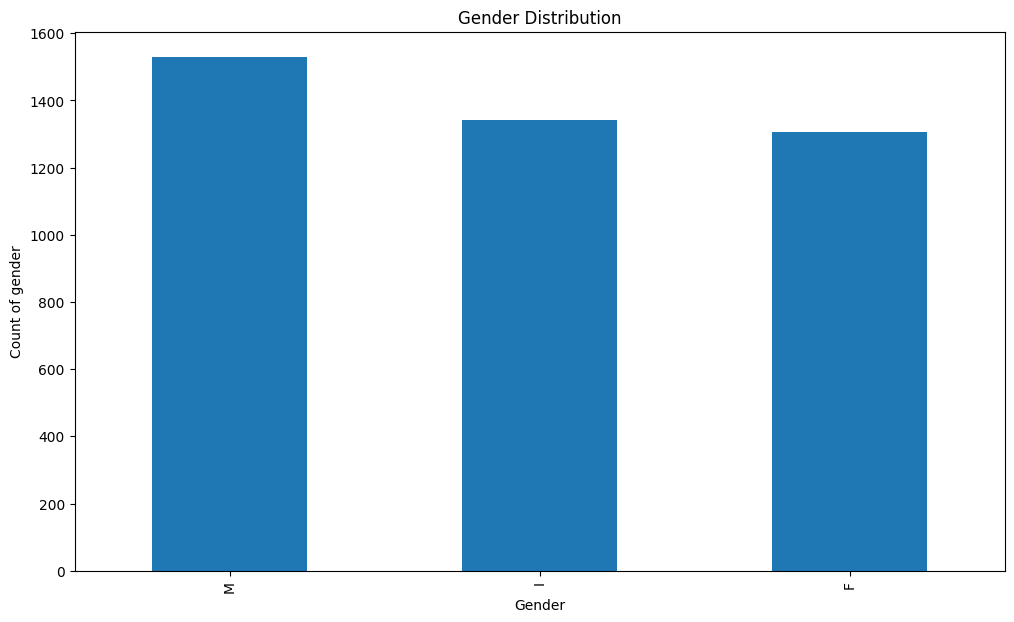

In [8]:
# Plotting the distribution of the 'sex' column

fig, ax = plt.subplots()

abalone['sex'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("Count of gender")
ax.set_title("Gender Distribution")

abalone['sex'].value_counts()

Let's make the histogram of the numeric variables, to understand it's distribution much better

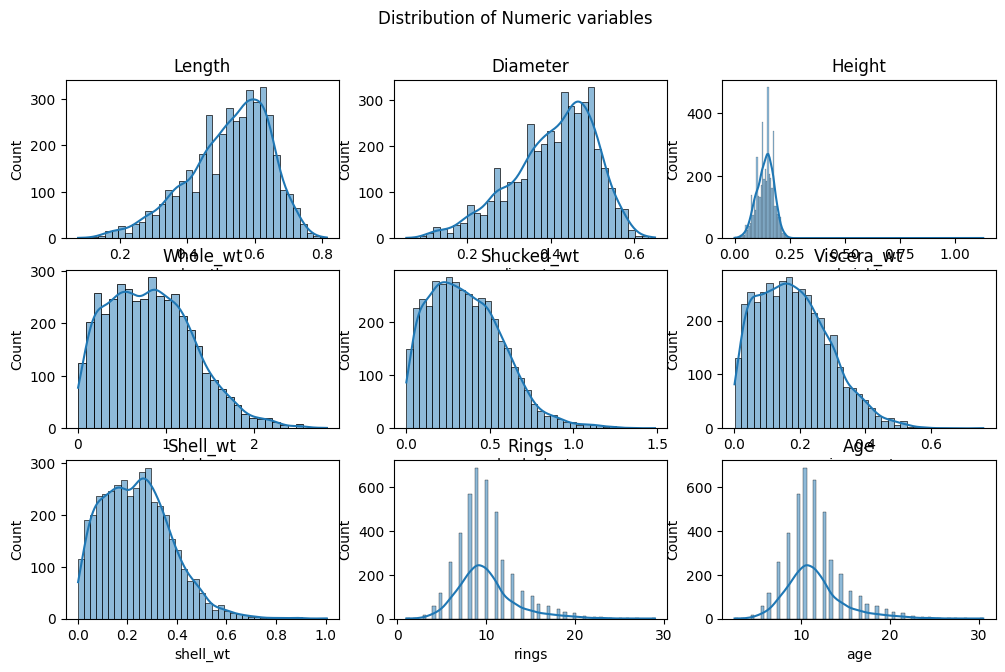

In [9]:
# Make a histogram of numeric variables

num_cols = [col for col in abalone.columns if abalone[col].dtype in ['float64', 'int64']]

fig, ax = plt.subplots(3, 3)

fig.suptitle("Distribution of Numeric variables")

for i, col in enumerate(num_cols):
    ax[int(i//3)][int(i%3)].set_title(col.capitalize())
    sns.histplot(x=col, data=abalone, ax=ax[int(i//3)][int(i%3)], kde=True)

Most of the distributions are **gaussian**, but a few a skewed, the **'height'** column seems to have a lot of outlier because there is a lot of distance between the minimum and maximum values in it.

**'rings'** and **'age'** column is sparsely distributed as it is a ordinal variable.(need to change in the further analysis)


Further all these variables can should be log transformed before feeding into the machine learning models.(Let's make a log transformation and see the data)

### ❓ Question 1: How old am I?

The first question is: **How does weight change with age for each of the three sex categories?**. In this, we will be making a visualization to view the relationship between weight and age for all three sex categories.

### 📝 Answer 1

There are a total of four kinds of weights in the data, they are: **'whole_wt'**, **'shucked_wt'**, **'viscera_wt'**, **'shell_wt'**

Let's plot the scatter plot of all the combinations and check how the weight is varying with age for all the three gender categories.

In [10]:
# Whole weight vs Age

px.scatter(abalone, x='age', y='whole_wt', facet_col='sex')

In [11]:
# Shucked weight vs Age

px.scatter(abalone, x='age', y='shucked_wt', facet_col='sex')

In [12]:
# Viscera weight vs Age

px.scatter(abalone, x='age', y='viscera_wt', facet_col='sex')

In [13]:
# Shell weight vs Age

px.scatter(abalone, x='age', y='shell_wt', facet_col='sex')

All the different types of weights have very similar relation to the age of the fish, but the difference is that the scales are different.

There is a slight difference in age and weight across different genders.

Differences are:

* If the gender is I, then the plot looks like a V-shaped curve with tilted towards right.
* If the gender is F, then the plot looks like a dense cloud which is approximately in a triangular shape.
* Finally, if the fish is a Male(M) one, that looks like combination of the other two plots.

**Similarity:** In all the different gender values, there is a positive correlation between the age and the weight.

<AxesSubplot:ylabel='sex'>

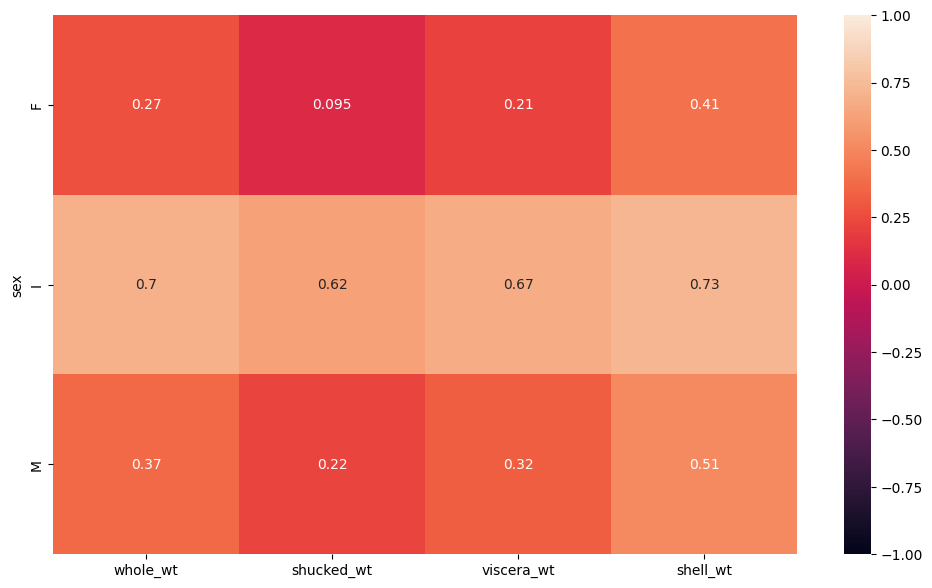

In [14]:
# Correlation heatmap

sns.heatmap(abalone[['whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'sex']].groupby(['sex']).corrwith(abalone['age']),
           annot=True, vmin=-1, vmax=1)

The age and weight are highly correlated for one particular type of gender and that is **'I'**.

For other genders, there is a weak positive correlation.

### ❓ Question 2&3: Relationship between Age and Physical Characteristics? And How?

The second question is: **Can you estimate an abalone's age using its physical characteristics?**. Now let us see if we can find a relation between the age of the abalone and physical characteristics of the fish.

The Third question is: **Investigate which variables are better predictors of age for abalones.** I will be using the model coefficients and the feature importance of the model instance to get this information.

### 📝 Answer 2&3

Let's build a linear regression model and use the R^2 value to evaluate how the model is performing and see the coefficients to know the weight of each feature in predicting the **'age'** of the abalone.

In [15]:
# Encoding the sex column

abalone['sex_encoded'] = np.where(abalone['sex'] == 'M', 0, np.where(abalone['sex'] == 'F', 1, 2))

In [16]:
# Seperating out features and variables

X = abalone.drop(['age', 'sex'], axis=1)
y = abalone['age']

In [17]:
# Linear Regression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [18]:
# Looking at the coefficents of the model

pd.DataFrame(columns=X.columns, data=reg.coef_.reshape(1, -1))

length      diameter        height      whole_wt    shucked_wt  \
0  8.811422e-16  3.774758e-15 -1.213338e-14 -3.392887e-15  4.117249e-15   

     viscera_wt      shell_wt  rings   sex_encoded  
0  4.439207e-15  2.023680e-15    1.0  1.504776e-16

In [19]:
# R^2 on the given data.

reg.score(X, y)

1.0

WOW, looks like the model is perfectly predicting the age of the given abalone's

By looking at the coefficients, we can find that rings is a main factor in determining the age of the abalone. That's true as **age = rings - 1.5**.

Let's drop the ring column and repeat the same experiment with all the other physical characteristics.

In [20]:
# Regression model without rings column

reg.fit(X.drop(['rings'], axis=1), y)

LinearRegression()

In [21]:
# Looking at the coefficents of the model

pd.DataFrame(columns=X.drop(['rings'], axis=1).columns, data=reg.coef_.reshape(1, -1))

length   diameter     height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0 -0.826399  11.964032  11.204492  9.070209  -20.106144  -10.155101  8.701106   

   sex_encoded  
0    -0.388483

In [22]:
# R^2 on the given data.

reg.score(X.drop(['rings'], axis=1), y)

0.5353445764938825

Now the coefficients make much more sense, in terms of predicting the age of the abalone.

It shows that the **'diameter', 'height', 'weight(whole and shell)'** are a good predictors of the **age**.
> The R^2 value says that the model is learning some thing without memorizing on the given data

In [28]:
# Actuals and Predictions

actuals = abalone['age']
predictions = reg.predict(X.drop(['rings'], axis=1))

results = pd.DataFrame()
results['Actuals'] = actuals
results['Predictions'] = predictions
results.head()

Actuals  Predictions
0     16.5    10.742310
1      8.5     9.310223
2     10.5    12.343880
3     11.5    11.201425
4      8.5     8.294101

The model which we have used in predicting the age of the abalone is a linear model, but sometimes, the relationship between the features and the age of the abalone can be non-linear which the LinearRegression fails to catch.

So let us use a non-linear or a tree based model in capturing the relationship.

In [23]:
# Fitting a Random Forest Model

rf = RandomForestRegressor()
rf.fit(X.drop(['rings'], axis=1), y)

RandomForestRegressor()

In [24]:
# R^2 on the given data.

rf.score(X.drop(['rings'], axis=1), y)

0.9372820790066283

One good thing about the Random Forest Models is that they also capture the importance of each feature with the target variable.(while constructing the ensemble of models)

<AxesSubplot:>

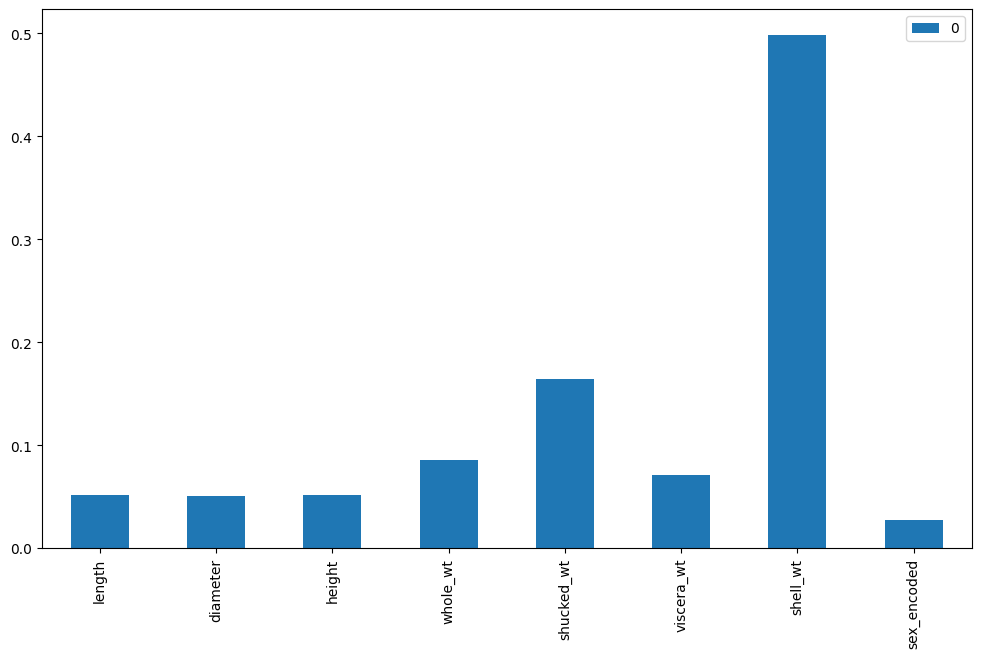

In [25]:
# Feature Importance

pd.DataFrame(index=X.drop(['rings'], axis=1).columns, data=rf.feature_importances_.reshape(-1, 1)).plot(kind='bar')

From the above feature importance plot we can see that the shell weight have a more weight on the age of the fish.

Let's look at the actual and predictions of the age from Random Forest

In [27]:
# Actuals and Predictions

actuals = abalone['age']
predictions = rf.predict(X.drop(['rings'], axis=1))

results = pd.DataFrame()
results['Actuals'] = actuals
results['Predictions'] = predictions
results.head()

Actuals  Predictions
0     16.5        14.08
1      8.5         8.74
2     10.5        11.07
3     11.5        11.32
4      8.5         8.35